In [3]:
import matplotlib.pyplot as plt

# Meeting 03.05.2024 Christoph-Nils-Arne
Varianz vorhersagen ist der Kern

einfaches Regressionsmodell 

GARCH
Nils LSTM

Kaggle aufsetzen 
Copilot

### Packages:
- AEON 
- SK Time 
- DARts 

optimal stopping 

LIteratur:
- https://rdcu.be/dGI38

subset = EURUSD[(EURUSD.index >= pd.to_datetime('2023-10-04')) & (EURUSD.index < pd.to_datetime('2023-10-05'))]

# Anzeigen des extrahierten Subsets# Nils - Arne 16.05.24
- extract USD - EURO pair from the dataset
- LinearRegression (ARne)
- GARCH(Nils)



In [4]:
!pip install arch --target=/kaggle/working/
import pandas as pd
import numpy as np
from matplotlib import pyplot
from arch import arch_model
file_path = '/kaggle/input/bb-rates/BB_Rates_15min_from_10-2023.xlsx'
data = pd.read_excel(file_path)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.4/983.4 kB 25.7 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 65.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 64.5 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 33.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 69.2 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.5/53.5 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 14.3 MB/s eta 0:

In [5]:
start_index = 3
EURUSD = data.iloc[start_index:, :2]

# Rename the columns
EURUSD.columns = ['Dates', 'Close']

# Display the first few rows of the new dataset to verify
print(EURUSD.tail())

                     Dates   Close
13539  2024-04-17 09:30:00  1.0632
13540  2024-04-17 09:45:00  1.0625
13541  2024-04-17 10:00:00   1.063
13542  2024-04-17 10:15:00  1.0642
13543  2024-04-17 10:30:00  1.0647


In [6]:
(13541/4)/24

141.05208333333334

In [7]:
print(EURUSD.iloc[0,0])
print(EURUSD.iloc[1,0])
print(EURUSD.iloc[13540,0] - EURUSD.iloc[0,0])

2023-10-03 23:00:00
2023-10-03 23:15:00
196 days, 11:30:00


In [8]:
85500/60

1425.0

In [9]:
# Convert the 'Dates' column to datetime format
EURUSD['Dates'] = pd.to_datetime(EURUSD['Dates'])

# Calculate the difference between consecutive dates
time_diffs = EURUSD['Dates'].diff().dropna()

# Check if all differences are 15 minutes
is_15min_apart = (time_diffs == pd.Timedelta(minutes=15)).all()

print("Are all dates 15 minutes apart in increasing order?", is_15min_apart)

Are all dates 15 minutes apart in increasing order? False


In [10]:
#test_EURUSD['Dates'] = EURUSD['Dates'].dt.date()

In [11]:
time_diffs_equal_15min = time_diffs == pd.Timedelta(minutes=15)

In [12]:
sum(time_diffs_equal_15min == False)

48

In [13]:
# Find the indices where the time differences are not 15 minutes
indices_not_15min = time_diffs_equal_15min[~time_diffs_equal_15min].index

# Print the indices
print("Indices where time differences are not 15 minutes apart:", indices_not_15min)

Indices where time differences are not 15 minutes apart: Index([  291,   780,  1272,  1764,  2256,  2747,  2749,  3241,  3243,  3732,
        3733,  4227,  4228,  4717,  5206,  5692,  5733,  5735,  5737,  5738,
        5739,  5740,  5741,  6125,  6525,  7016,  7508,  7999,  8493,  8494,
        8982,  8984,  8985,  9470,  9959, 10449, 10450, 10462, 10846, 11338,
       11341, 11828, 11829, 12318, 12320, 12808, 13296, 13297],
      dtype='int64')


In [14]:
indices_not_15min[1:] - indices_not_15min[:-1]

Index([489, 492, 492, 492, 491,   2, 492,   2, 489,   1, 494,   1, 489, 489,
       486,  41,   2,   2,   1,   1,   1,   1, 384, 400, 491, 492, 491, 494,
         1, 488,   2,   1, 485, 489, 490,   1,  12, 384, 492,   3, 487,   1,
       489,   2, 488, 488,   1],
      dtype='int64')

In [15]:
(492/4)/24

5.125

In [16]:
EURUSD.head()

,Dates,Close
3,2023-10-03 23:00:00,1.0469
4,2023-10-03 23:15:00,1.0466
5,2023-10-03 23:30:00,1.0465
6,2023-10-03 23:45:00,1.0465
7,2023-10-04 00:00:00,1.0468


In [17]:
EURUSD['Dates'] = pd.to_datetime(EURUSD['Dates'])

# Extrahieren aller Datenpunkte, die zum 4. Oktober 2023 gehören
subset = EURUSD[EURUSD['Dates'].dt.date == pd.to_datetime('2023-10-04').date()]

In [18]:
subset.head()

,Dates,Close
7,2023-10-04 00:00:00,1.0468
8,2023-10-04 00:15:00,1.0467
9,2023-10-04 00:30:00,1.0467
10,2023-10-04 00:45:00,1.0465
11,2023-10-04 01:00:00,1.0465


In [19]:
subset.set_index('Dates', inplace=True)

In [20]:
subset.loc[:, 'Close'] = pd.to_numeric(subset['Close'], errors='coerce')

# Überprüfen des Datentyps der Spalte 'Close' nach der Konvertierung
print(subset['Close'].dtype)

object


In [21]:
print(subset.Close.dtype)

object


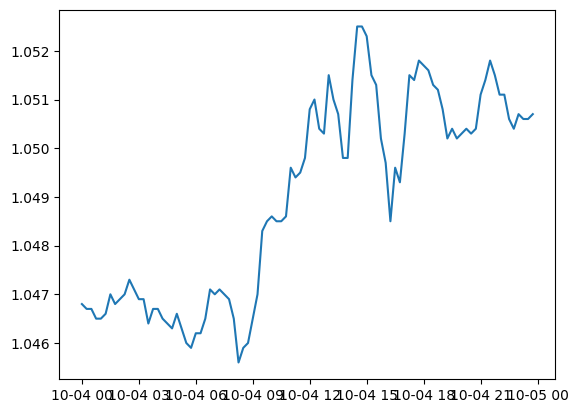

In [22]:
pyplot.plot(subset['Close'])
pyplot.show()

In [23]:
from statsmodels.graphics.tsaplots import plot_acf

In [ ]:
close_series = pd.Series(subset['Close'])
squared_data = close_series ** 2
# create acf plot
plot_acf(squared_data)
pyplot.show()

In [ ]:
n_test = 10
train, test = subset[:-n_test], subset[-n_test:]

In [ ]:
scaled_train = train * 1000

In [ ]:
print(scaled_train['Close'].head())
scaled_train['Close']= pd.to_numeric(scaled_train['Close'])


## Summary stuff

## Models and Testing

Garch(2,1)

In [ ]:
model = arch_model(scaled_train['Close'], mean='Zero', vol='GARCH', p=2, q=1)
# fit model
model_fit = model.fit()
# forecast the test set
yhat = model_fit.forecast(horizon=n_test)

In [ ]:
model = arch_model(scaled_train['Close'], mean='Zero', vol='GARCH', p=2, q=1)
# fit model
model_fit = model.fit()
# forecast the test set
yhat = model_fit.forecast(horizon=n_test)

In [ ]:
print(yhat)

In [ ]:
pyplot.plot(yhat.variance.values[-1, :])
pyplot.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(model_fit.resid)
plt.title('Residuen')
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox

# ACF-Plot der Residuen
plot_acf(model_fit.resid, lags=40)
plt.title('Autokorrelationsfunktion der Residuen')
plt.show()



In [ ]:
# Ljung-Box-Test
ljung_box_result = acorr_ljungbox(model_fit.resid, lags=[10], return_df=True)
print(ljung_box_result)

Der niedrige P-Wert und der hohe Ljung Box wert suggerieren, dass die abhängigkeit der Daten nicht gut erfasst werden kann. Schlussfolgerung = Modell ist kacke

In [ ]:
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import jarque_bera

# Q-Q-Plot der Residuen
qqplot(model_fit.resid, line='s')
plt.title('Q-Q-Plot der Residuen')
plt.show()

# Jarque-Bera-Test
jb_test_result = jarque_bera(model_fit.resid)
print('Jarque-Bera-Test: p-Wert =', jb_test_result[1])

###### 

### ARMA GARCH 

### ARMA GARCH (2,1)

In [ ]:
model_arma_garch = arch_model(scaled_train['Close'], mean='AR', lags=1, vol='Garch', p=2, q=1)
results_arma_garch = model_arma_garch.fit()
print(results_arma_garch.summary())

In [ ]:
residuals = results_arma_garch.resid

# warum ist da ein NaN drin?
residuals_clean = residuals.dropna()

# ACF-Plot der Residuen
plot_acf(residuals_clean, lags=40)
plt.title('Autokorrelationsfunktion der Residuen')
plt.show()

In [ ]:

# Q-Q-Plot der Residuen
qqplot(residuals_clean, line='s')
plt.title('Q-Q-Plot der Residuen')
plt.show()

# Jarque-Bera-Test
jb_test_result = jarque_bera(residuals_clean)
print('Jarque-Bera-Test: p-Wert =', jb_test_result[1])

H0 dass die Residuen Normalverteilt sind kann bei signifikanz von 5% abgelehnt werden.